This is an example code to generate classification data of two classes 

Based on the code above, generate data similar to

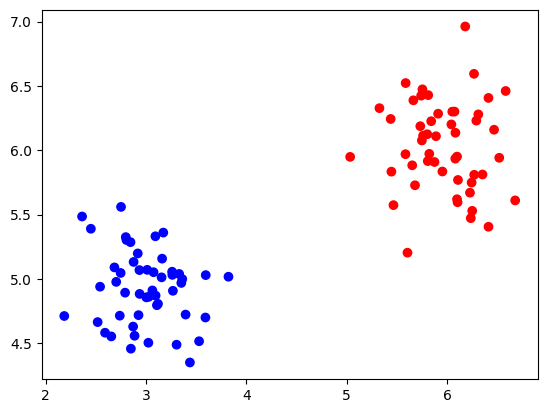

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N1 = 50 #100 or 50
N2 = 50
K = 2
sigma = 0.1

mean = (6, 6)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
cl = ['red'] * len(X1)

mean = (3, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

# Outlier:
mean = (8, 6)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, int(np.floor(N2)))
c3 = ['blue'] * len(X3)

#X2 = np.concatenate((X2, X3))  # open for n1=100 and close for n1=50
#c2 = np.concatenate((c2, c3))  # open for n1=100 and close for n1=50

X = np.concatenate((X1, X2))
color = np.concatenate((cl, c2))

T = []
for n in range(0, len(X)):
    if n < len(X1):
        T.append(0)
    if (n>=len(X1) and n<len(X1)+len(X2)):
        T.append(1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

Implement the MAP for classification, so that using the above data as training, we can generate a classifier in the basis function space (a space with higher dimensionality). Show the first and second bases similar to: 

In [2]:
def space_transformation(x, mu, S):
    '''
    x: N-2
    mu: 1-2
    S: 
    '''
    k = np.array([np.linalg.norm(sublist - mu) for sublist in x]) #1-N
    trans = [np.exp(k_n ** 2 / (-2 * S ** 2)) for k_n in k]
    return trans

In [3]:
phi0 = [1] * 100

In [4]:
S = 1.5
for i in range(len(X)):
    mu1 = [6,6]
    phi1 = space_transformation(X, mu1, S) ###100-1
for i in range(len(X)):
    mu1 = [3,5]
    phi2 = space_transformation(X, mu1, S) ###100-1

phi = np.column_stack((phi0, phi1, phi2)) ###100-3

In [5]:
#phi0 = np.ones((50,1))

In [6]:
#phi1 = np.column_stack((phi0, phi1_2, phi1_3))###50-3
#phi2 = np.column_stack((phi0, phi2_2, phi2_3))###50-3
#phi = np.concatenate((phi1, phi2)) ###100-3

In [7]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

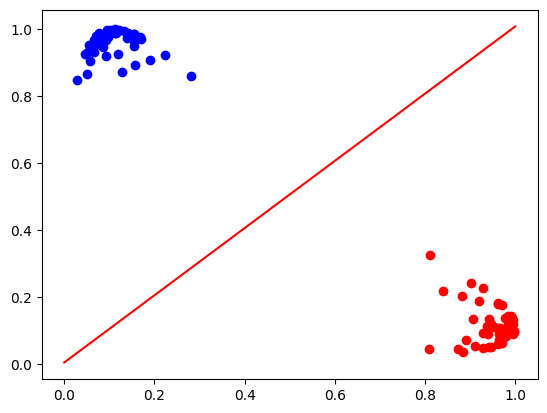

In [8]:
alpha = 0.1
S = alpha * np.eye(3)
m_0 = np.zeros(3)


initial_guess = np.array([0,0,0])
tolerance = 1e-7
max_iterations = 100

w = initial_guess

for iteration in range(max_iterations):
    
    sig = []
    for i in range(100):
        a = w.T @ phi[i] ### 1-3 @ 3-1 ### 1-1
        s = sigmoid(a) ### 1-1
        sig.append(s) ### 1-100
        
    t1 = np.ones(50).T ### 1-50
    t2 = np.zeros(50).T
    t = np.concatenate((t1, t2)) ### 1-100
     
    del_E_w = np.linalg.inv(S) @ (w - m_0) + phi.T @ (sig - t)  ### 3-1
    
    SIG = [a * (1-a) for a in sig] 
    R = np.diag(SIG) ### 100-100
    H = np.linalg.inv(S) + phi.T @ R @ phi
    H_1 = np.linalg.inv(H)
    w_new = w - H_1 @ del_E_w
    
    if np.all(np.abs(w_new - w) < tolerance):
        break
    
    w = w_new

def classification(x):
    return ((-w[0] - w[1] * xx)/w[2])

plt.scatter(phi[:50, 1],phi[:50, 2], color="r")
plt.scatter(phi[50:, 1],phi[50:, 2], color="b")

xx = np.linspace(0, 1, 100)
plt.plot(xx, classification(xx), color="r")
plt.show()

In the testing stage, use any other locations in the original space (in the original space with low dimensionality, in the range of 0 to 10) as the test data, and plot the predicted labels (whose values between 0 to 1) in colors similar to:

In [9]:
ppp = np.zeros([10,10])
y_axis, x_axis = ppp.shape

In [10]:
def trans(x, mu, S):
    '''
    x: N-2
    mu: 1-2
    S: 
    '''
    
    k = np.array([np.linalg.norm(x - mu)]) #1-N
    trans = [np.exp(k ** 2 / (-2 * S ** 2))]
    return trans

In [11]:
xx = np.array([10, 10])
mu1 = np.array([6, 6])
S = 1.5
phi1 = trans(xx, mu1, S)

In [12]:
mu = [4,5,6]

for y in range(0,y_axis):
    for x in range (0,x_axis):
        
        phi0 = np.array([1])
        xx = [x, y]
        mu1 = np.array([6, 6])
        phi1 = trans(xx, mu1, S)
        mu2 = np.array([3, 5])
        phi2 = trans(xx, mu2, S)
        phi_test = np.column_stack((phi0, phi1, phi2))
        
        predict = np.array(phi_test) @ w
        label = 1 / (1 + np.exp(-predict))
        ppp[x, y] = label

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_99139/3692162042.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ppp[x, y] = label


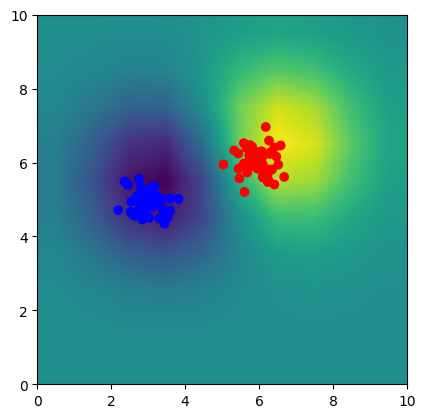

In [13]:
plt.imshow(ppp.T, interpolation = "bilinear", origin = 'lower', extent = [0, 10, 0, 10]) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c = color)
plt.show()